# Метод главных компонент. Алгоритм k ближайших соседей

In [59]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [60]:
digits = load_digits()

In [61]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [62]:
X = digits['data']
y = digits['target']

In [63]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [64]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [65]:
X.shape

(1797, 64)

In [66]:
from matplotlib import pyplot as plt
import numpy as np

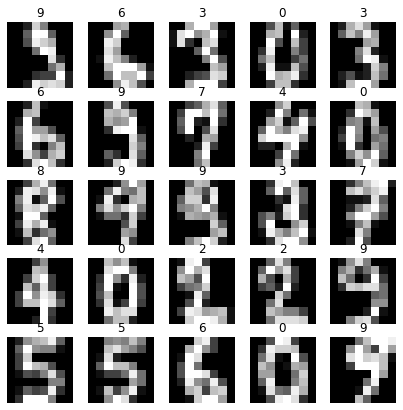

In [67]:
fig, axs = plt.subplots(5, 5, figsize=(7, 7))
for i in range(5):
    for j in range(5):
        k = np.random.randint(0, 1797)
        axs[i, j].imshow(X[k,:].reshape(8, 8), cmap = 'gray')
        axs[i, j].set_title(y[k])
        axs[i, j].axis('off')


In [68]:
class my_PCA(): 
    def __init__(self, n_components=None): 
        self.n_components = n_components  
    
    def fit(self, X): 
        X_c = X - X.mean(axis=0)
        C = X_c.T.dot(X_c) / (len(X_c) - 1)
        eig_val, F = np.linalg.eig(C)
        return X_c, eig_val, F    
    
    def transform(self, X):
        X_c, eig_val, F = self.fit(X)
        return X_c @ F[:, : self.n_components]
    
    def fit_transform(X): 
        fit()
        transform()

In [69]:
PCA = my_PCA()
X_c, eig_val, F = PCA.fit(X)
eig_val

array([1.79006930e+02, 1.63717747e+02, 1.41788439e+02, 1.01100375e+02,
       6.95131656e+01, 5.91085249e+01, 5.18845391e+01, 4.40151067e+01,
       4.03109953e+01, 3.70117984e+01, 2.85190412e+01, 2.73211698e+01,
       2.19014881e+01, 2.13243565e+01, 1.76367222e+01, 1.69468639e+01,
       1.58513899e+01, 1.50044602e+01, 1.22344732e+01, 1.08868593e+01,
       1.06935663e+01, 9.58259779e+00, 9.22640260e+00, 8.69036872e+00,
       8.36561190e+00, 7.16577961e+00, 6.91973881e+00, 6.19295508e+00,
       5.88499123e+00, 5.15586690e+00, 4.49129656e+00, 4.24687799e+00,
       4.04743883e+00, 3.94340334e+00, 3.70647245e+00, 3.53165306e+00,
       3.08457409e+00, 2.73780002e+00, 2.67210896e+00, 2.54170563e+00,
       2.28298744e+00, 1.90724229e+00, 1.81716569e+00, 1.68996439e+00,
       1.40197220e+00, 1.29221888e+00, 1.15893419e+00, 9.31220008e-01,
       6.69850594e-01, 4.86065217e-01, 2.52350432e-01, 9.91527944e-02,
       6.31307848e-02, 6.07377581e-02, 3.96662297e-02, 1.49505636e-02,
      

Text(0, 0.5, 'Собственные значения')

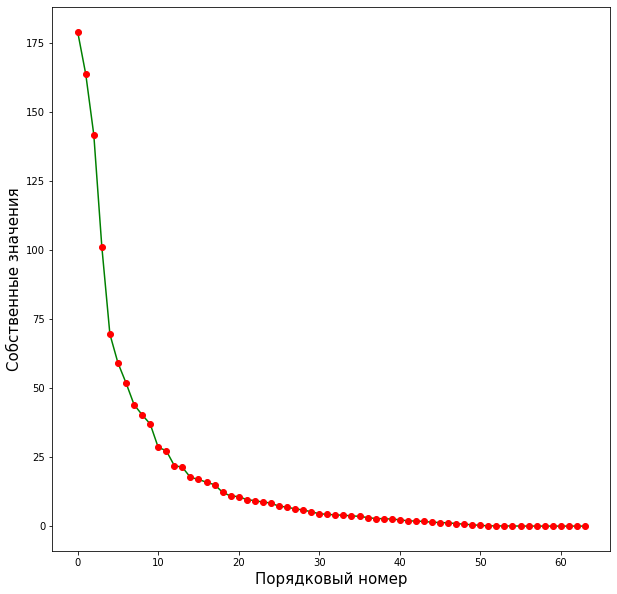

In [70]:
x = eig_val
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(x, color = 'green')
ax.plot(x, 'o', color = 'red')
ax.set_xlabel('Порядковый номер', fontsize=15)
ax.set_ylabel('Собственные значения', fontsize=15)

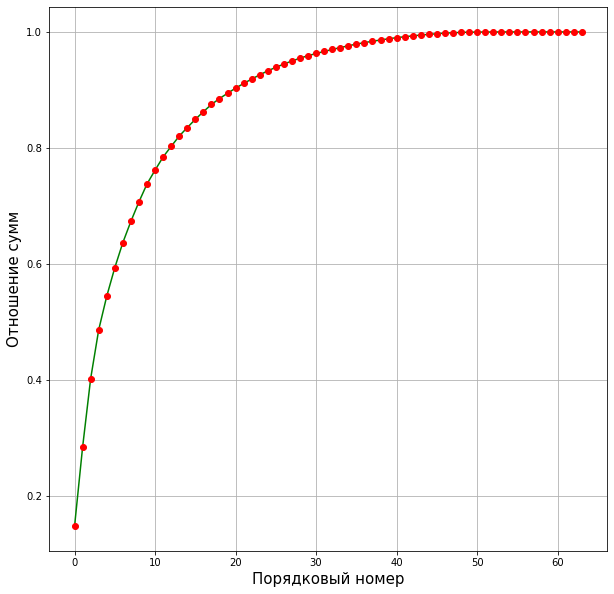

In [71]:
x = np.cumsum(eig_val) / np.sum(eig_val)
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(x, color = 'green')
ax.plot(x, 'o', color = 'red')
ax.set_xlabel('Порядковый номер', fontsize=15)
ax.set_ylabel('Отношение сумм', fontsize=15)
ax.grid()

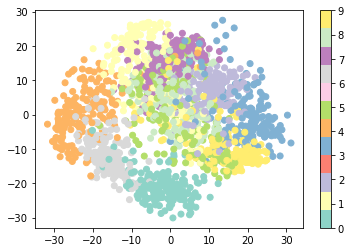

In [85]:
X_ = PCA.transform(X)
plt.scatter(X_[:, 0], X_[:, 1], c=y, cmap='Set3')
plt.colorbar()

# Алгоритм kNN

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [87]:
class my_kNN():
    
    def __init__(self, n_neighbours = 5):
        self.n_neighbours = n_neighbours
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        x_class = list()
        for item in X: 
            dist = list() 
            for i in self.X_train:
                #вычисляем расстояние от точки до каждого элемента X_train
                dist_i = np.linalg.norm(np.array(item) - np.array(i)) 
                dist.append(dist_i)
            dist = np.array(dist)
            #вычисляем индексы первых k минимальных расстояний
            min_dist_arg = np.argsort(dist)[:self.n_neighbours] 
            min_dist_labels = list()
            for i in min_dist_arg:
                #индексы соседей
                min_dist_labels.append(self.y_train[i]) 
            #вычисляем уникальные индексы и их количество
            values, counts = np.unique(min_dist_labels, return_counts = True) 
            #находим максимальное число вхождений
            possible_label = values[np.argmax(counts)]
            x_class.append(possible_label)
        return x_class

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1500, random_state=42)
test_k_2 = my_kNN(2)
test_k_2.fit(X_train, y_train)
y_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_k_2) * 100)
test_k_5 = my_kNN()
test_k_5.fit(X_train, y_train)
y_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_k_5) * 100)
test_k_7 = my_kNN(7)
test_k_7.fit(X_train, y_train)
y_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_k_7) * 100)
test_k_15 = my_kNN(15)
test_k_15.fit(X_train, y_train)
y_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_k_15) * 100)
test_k_30 = my_kNN(30)
test_k_30.fit(X_train, y_train)
y_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_k_30) * 100)

Точность при k = 2: 94.86666666666666
Точность при k = 5: 94.73333333333333
Точность при k = 7: 93.60000000000001
Точность при k = 15: 91.26666666666667
Точность при k = 30: 86.33333333333333
